In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import  metrics
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('D:\\24 - Machine_Learning\\download files\\bank\\bank.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
df.shape

(4521, 17)

In [4]:
df.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4517,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4519,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
df['poutcome'] = df['poutcome'].map({'failure' : -1, 'unknown' : 0, 'success' : 1, 'other' : 0})

In [7]:
df['default'] = df['default'].map({'yes': 0, 'no':1})
df['housing'] = df['housing'].map({'yes': 0, 'no':1})
df['loan'] = df['loan'].map({'yes': 0, 'no':1})

In [8]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,1,1787,1,1,cellular,19,oct,79,1,-1,0,0,no
1,33,services,married,secondary,1,4789,0,0,cellular,11,may,220,1,339,4,-1,no
2,35,management,single,tertiary,1,1350,0,1,cellular,16,apr,185,1,330,1,-1,no
3,30,management,married,tertiary,1,1476,0,0,unknown,3,jun,199,4,-1,0,0,no
4,59,blue-collar,married,secondary,1,0,0,1,unknown,5,may,226,1,-1,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,1,-333,0,1,cellular,30,jul,329,5,-1,0,0,no
4517,57,self-employed,married,tertiary,0,-3313,0,0,unknown,9,may,153,1,-1,0,0,no
4518,57,technician,married,secondary,1,295,1,1,cellular,19,aug,151,11,-1,0,0,no
4519,28,blue-collar,married,secondary,1,1137,1,1,cellular,6,feb,129,4,211,3,0,no


In [9]:
nominal = ['job', 'marital', 'education', 'contact', 'month']
data = pd.get_dummies(df, columns = nominal)

In [10]:
df.shape

(4521, 17)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   int64 
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   int64 
 7   loan       4521 non-null   int64 
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   int64 
 16  y          4521 non-null   object
dtypes: int64(11), object(6)
memory usage: 600.6+ KB


In [12]:
data['y'] = data['y'].map({'yes':1, 'no':0})

In [13]:
data = data.drop(['duration'], axis=1)

In [14]:
op = data.pop('y')

In [15]:
train_feat, test_feat, train_classes, test_classes = train_test_split(data,op,train_size = 0.8, random_state=40)

In [16]:
knn = KNeighborsClassifier(n_neighbors=2)

In [17]:
knn.fit(train_feat, train_classes)

KNeighborsClassifier(n_neighbors=2)

In [18]:
pred = knn.predict(test_feat)

In [19]:
print("Accuracy: ", metrics.accuracy_score(test_classes, pred))

Accuracy:  0.876243093922652


In [20]:
neighbors = np.arange(1,9)

In [21]:
train_accuracy = np.empty(len(neighbors))

In [22]:
test_accuracy = np.empty(len(neighbors))

In [23]:
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fit the model
    knn.fit(train_feat, train_classes)
    #compute accuracy on training set
    train_accuracy[i] = knn.score(train_feat, train_classes)
    #compute accuracy on test set
    test_accuracy[i] = knn.score(test_feat, test_classes)

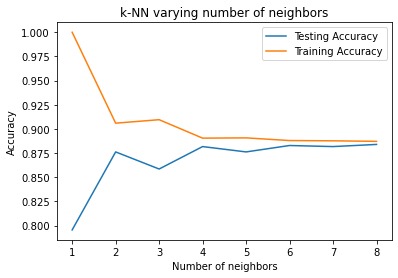

In [24]:
plt.title('k-NN varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()